In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    Samplers,
    SequentialEvaluator,
)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [2]:
# Initialize the model
dike_model, planning_steps = get_model_for_problem_formulation(6)
# Load the experiments and outcomes from MOEA and drop unnecessary columns
experiments = pd.read_csv('Results/Final_policies_experiments.csv')
outcomes = pd.read_csv('Results/Final_policies_outcomes.csv')
outcomes.drop(columns='Unnamed: 0', inplace=True)

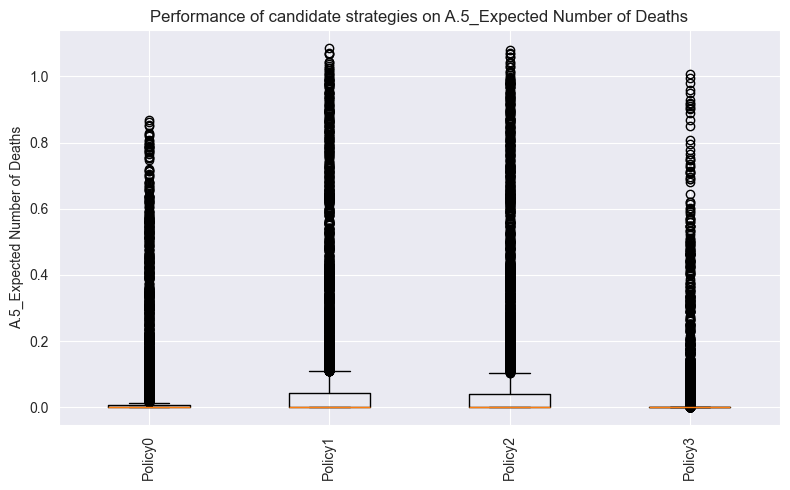

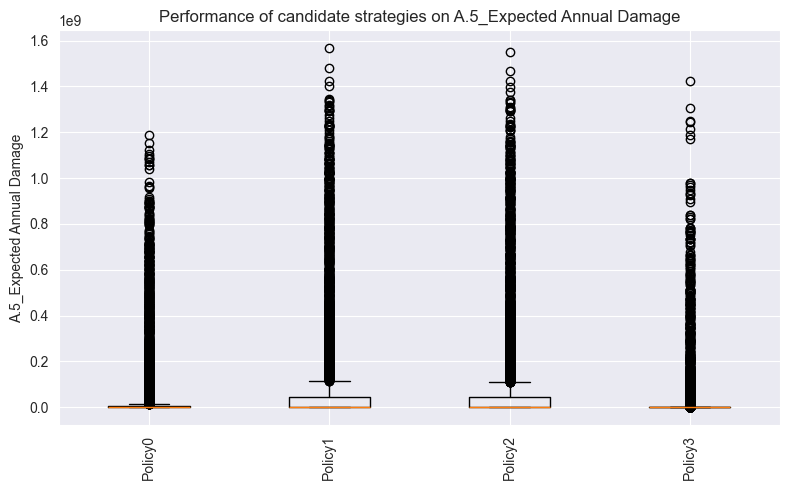

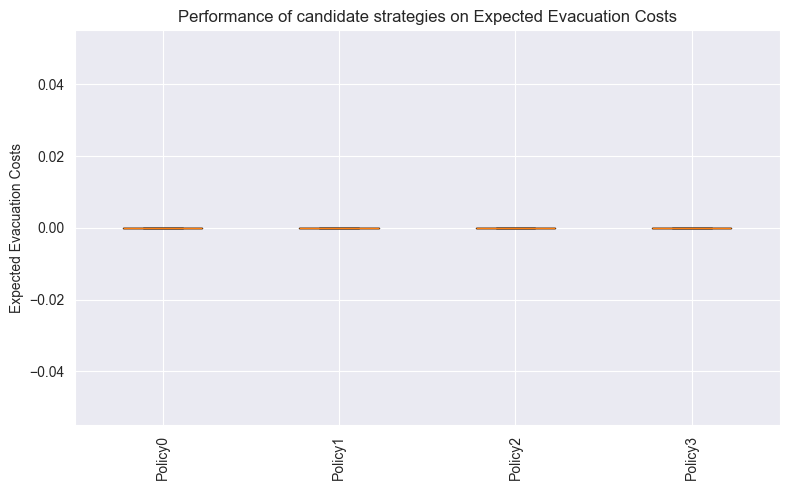

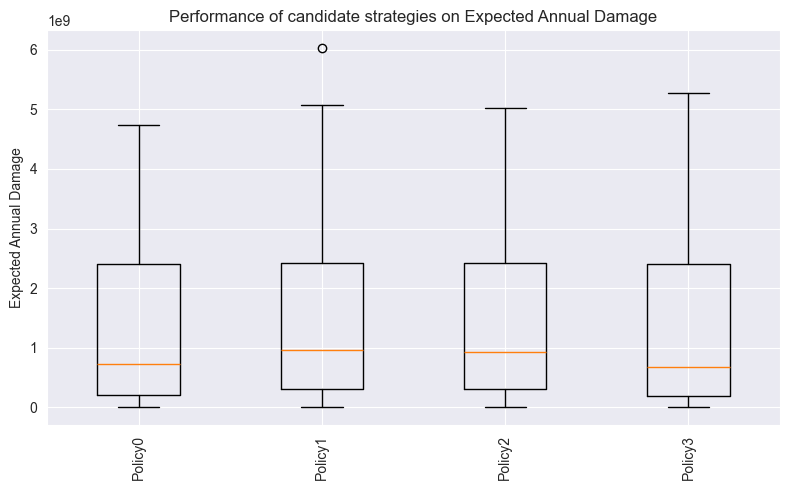

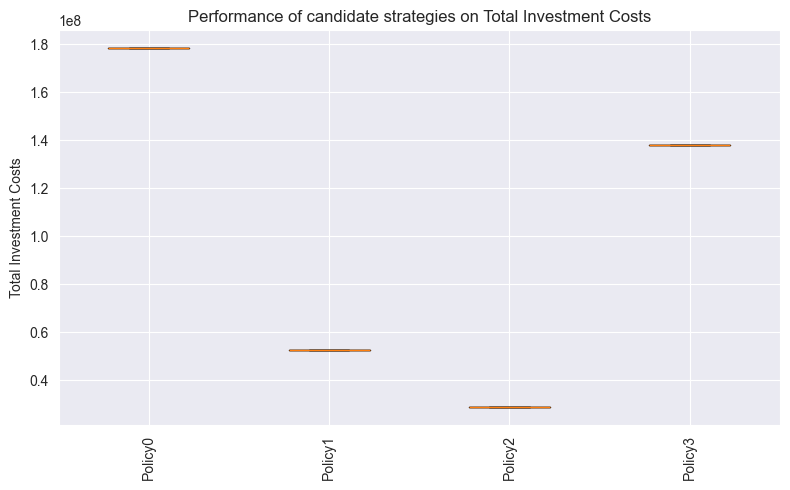

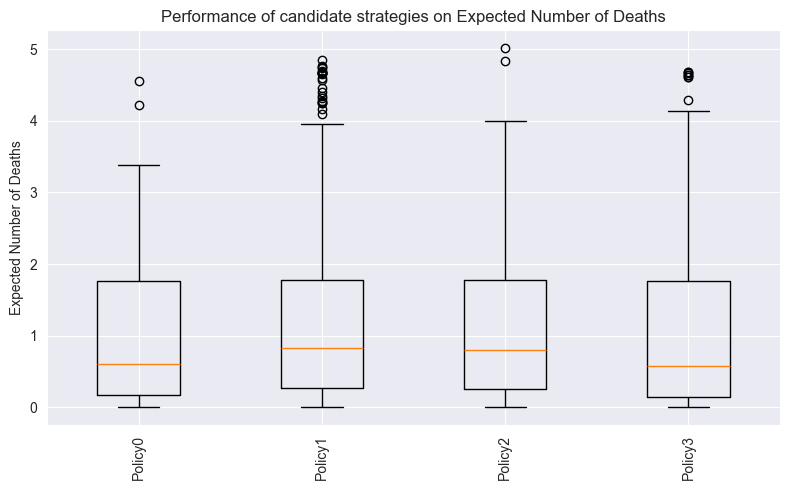

In [6]:
# Define a function to split the outcome dataframe into multiple dataframes for each candidate strategy
def split_dataframes(dataframe):
    dataframes = []
    # Manually determine the splitting indexes
    for i in range(6000, 24001, 6000):
        start = i - 6000
        end = i
        df = dataframe.iloc[start:end]
        dataframes.append(df)
    return dataframes

# Define a function to plot a boxplot for each policy
def Boxplots_policies(dataframes, outcomes, x_labels):   
    # Loop over the objectives and retrieve the data for that objective
    # Plot a Boxplot
    for out in outcomes:
        data = [df[out].dropna() for df in dataframes if out in df.columns]
        plt.figure(figsize=(8, 5))
        plt.boxplot(data, labels=x_labels)
        plt.title(f'Performance of candidate strategies on {out}')
        plt.ylabel(out)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'Plots/Performance of candidate strategies on {out}.png')
        plt.show()

# Create a list of dataframes by calling the pre-defined function
dataframes = split_dataframes(outcomes)
# Define a list of labels for the x-axis
x_labels = [f'Policy{i}' for i in range(len(dataframes))]

# Create the boxplots
Boxplots_policies(dataframes, list(outcomes.columns), x_labels)

In [4]:
# Define the 80 percentile threshold for each desired objective
percentile_80_A5_deaths = np.percentile(outcomes["A.5_Expected Number of Deaths"], 80)
percentile_80_A5_damage = np.percentile(outcomes["A.5_Expected Annual Damage"], 80)
percentile_80_TT_deaths = np.percentile(outcomes["Expected Number of Deaths"], 80)
percentile_80_TT_damage = np.percentile(outcomes["Expected Annual Damage"], 80)

# Create a dataframe for both A.5 and the combined objectives in which only the top 20th worst cases are incorporated
df_20thA5 = outcomes[(outcomes["A.5_Expected Number of Deaths"] > percentile_80_A5_deaths) | (outcomes["A.5_Expected Annual Damage"] > percentile_80_A5_damage)]
df_20thTT = outcomes[(outcomes["Expected Number of Deaths"] > percentile_80_TT_deaths) | (outcomes["Expected Annual Damage"] > percentile_80_TT_damage)]

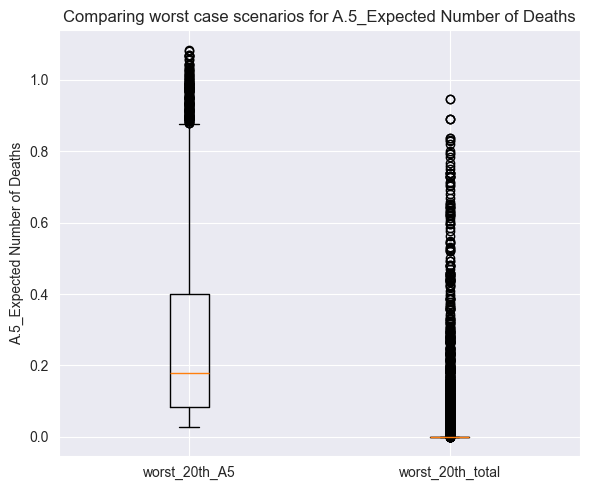

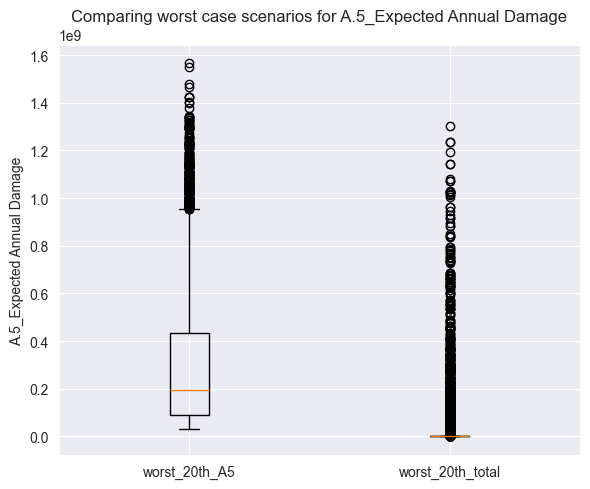

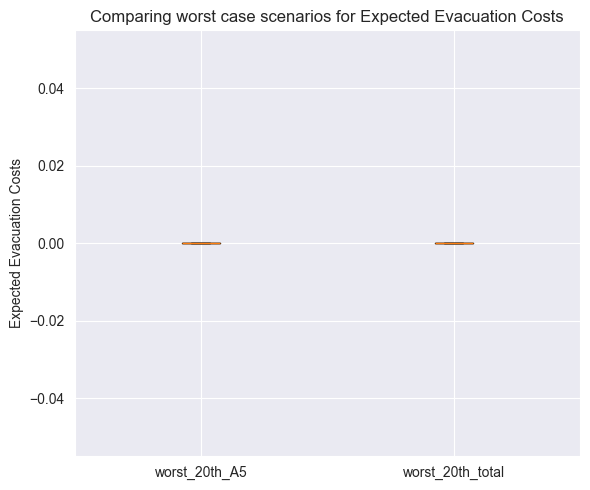

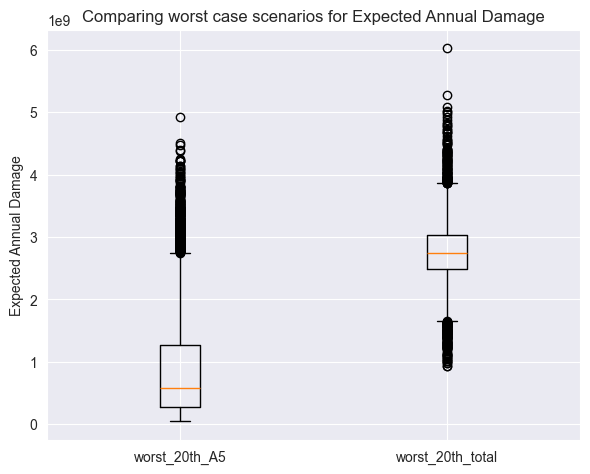

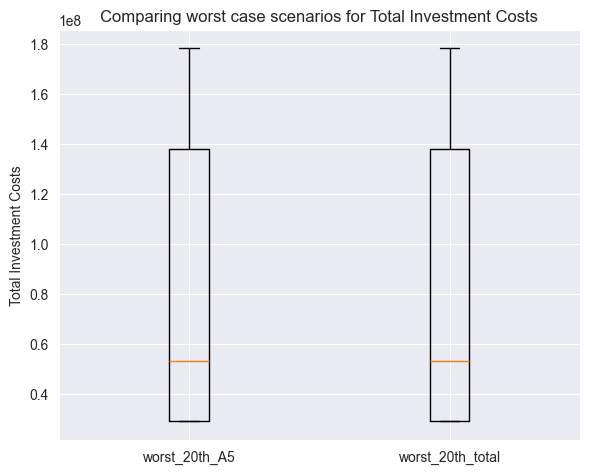

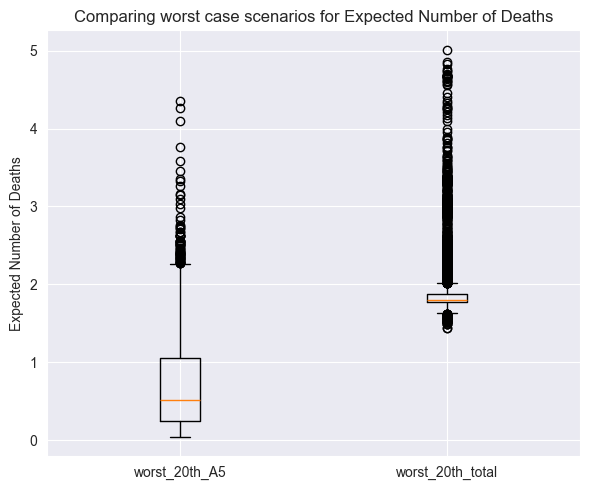

In [5]:
# Define a function to plot a boxplot for each scenario region
def Boxplots_scenarios(dataframes, outcomes, x_labels):
    # Loop over the objectives and retrieve the data for that objective
    # Plot a Boxplot
    for out in outcomes:
        data = [df[out].dropna() for df in dataframes if out in df.columns]
        plt.figure(figsize=(6, 5))
        plt.boxplot(data, labels=x_labels)
        plt.title(f'Comparing worst case scenarios for {out}')
        plt.ylabel(out)
        plt.tight_layout()
        plt.savefig(f'Plots/Comparing worst case scenarios for {out}.png')
        plt.show()
        
# Define a list of dataframes and labels
dataframes = [df_20thA5, df_20thTT]
x_labels = ['worst_20th_A5', 'worst_20th_total']

# Create the boxplots
Boxplots_scenarios(dataframes, list(outcomes.columns), x_labels)